In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import  Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
# This function applies the S gate (phase shift gate) to qubits
# in a quantum circuit depending on the provided binary 
# 'state' string. It modifies the first or second qubit
# based on the specific input state
def s_gate(qc, state):
    # For '01', it applies the S gate to the first qubit
    # and the identity gate to the second.
    if state == '01':
        qc.s(qreg_q[0])
        qc.i(qreg_q[1])
    # For '10', it applies the S gate to the second qubit
    # and the identity gate to the first.
    elif state == '10':
        qc.s(qreg_q[1])
        qc.i(qreg_q[0])
    # For '00', it applies the S gate to both qubits 
    # simultaneously.
    elif state == '00':
        qc.s([qreg_q[0], qreg_q[1]])
    # If the state is not recognized, no operations are
    # performed, and the circuit is returned unchanged.
    else:
        #qc.cz(0,1)
        pass
    return qc

In [3]:
# Define the Oracle function
def oracle(qc, state):
    # Call s_gate function with the state passed to this function
    qc = s_gate(qc, state)
    # Apply controlled Z from qubit 0 to qubit 1
    qc.cz(0,1)
    qc = s_gate(qc, state)
    return qc

In [4]:
# Define the diffusion function
def diffusion(qc):
    # Apply Hadamard gate to create superposition on both qubits
    qc.h([0,1])
    # Apply Z gate to both qubits
    qc.z([0,1])
    # Apply controlled Z from qubit 0 to qubit 1
    qc.cz(0,1)
    # Apply Hadamard on both qubits
    qc.h([0,1])
    return qc

In [5]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
grover_circuit = QuantumCircuit(qreg_q, creg_c)
# Apply Hadamard to all the three qubits to
# create superposition
grover_circuit.h(qreg_q[0])
grover_circuit.h(qreg_q[1])

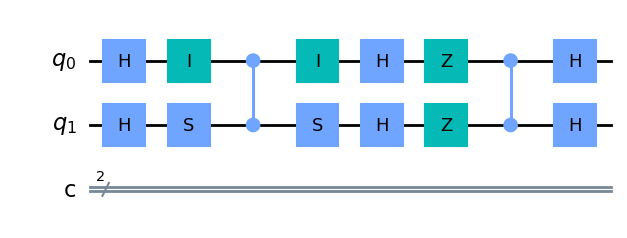

In [6]:
# Apply Oracle with the state to be searched - ‘10’.
# Change the state value for different search states.
grover_circuit = oracle(grover_circuit, state='10')   ## change the state value for different search states
# Apply diffusion logic
grover_circuit = diffusion(grover_circuit)
# Draw the circuit
grover_circuit.draw(output='mpl')

In [7]:
sim = Aer.get_backend('aer_simulator')
# we need to mMake a copy of the circuit with the 'save_statevector'
# instruction to run on the Aer simulator
grover_circuit_sim = grover_circuit.copy()
grover_circuit_sim.save_statevector()
qobj = assemble(grover_circuit_sim)

In [8]:
result = sim.run(qobj).result()
statevec = result.get_statevector()
from qiskit_textbook.tools import vector2latex
# Display the state vector
vector2latex(statevec, pretext="|\\psi\\rangle ="), statevec

<IPython.core.display.Math object>

(None,
 Statevector([0.+2.46519033e-32j, 0.+2.46519033e-32j, 0.+2.46519033e-32j,
              0.+2.46519033e-32j],
             dims=(2, 2)))

In [9]:
# Measure the states of qubits 0 and 1 in
# the Grover circuit and store the results in
# classical bits 0, 1
grover_circuit.measure([0,1],[0,1])
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_circuit)
result = aer_sim.run(qobj, shots=1000).result()

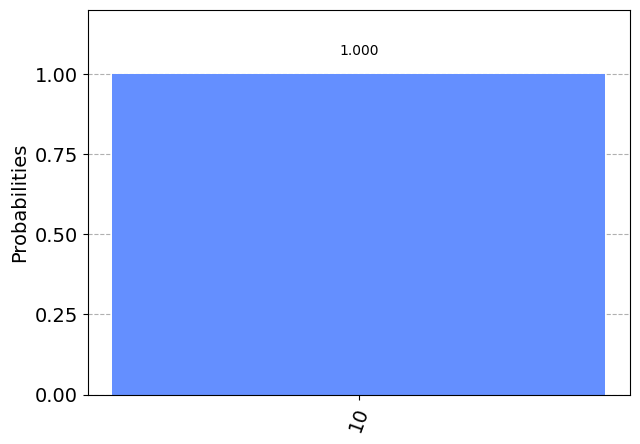

In [10]:
counts = result.get_counts()
plot_histogram(counts)